In [ ]:
%pip install jupyter pandas sympy
%pip install beautifulsoup4 lxml html5lib
%pip install pint

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [2]:
from modsim import *

system contains 12 bikes and two bike racks, one at Olin and one at Wellesley, each with the capacity to hold 12 bikes.

In [3]:
bikeshare=State(olin=10,wellesley=2)
bikeshare.olin

10

In [4]:
bikeshare.wellesley

2

In [5]:
show(bikeshare)

,state
olin,10
wellesley,2


In [6]:
print(bikeshare)

olin         10
wellesley     2
Name: state, dtype: int64


In [7]:
bikeshare.olin=9
bikeshare.wellesley=3

In [8]:
show(bikeshare)

,state
olin,9
wellesley,3


In [9]:
bikeshare.olin-=1
bikeshare.wellesley+=1

In [10]:
show(bikeshare)

,state
olin,8
wellesley,4


In [11]:
def bike_to_wellesley():
  bikeshare.olin-=1
  bikeshare.wellesley+=1
bike_to_wellesley()

In [12]:
show(bikeshare)

,state
olin,7
wellesley,5


In [13]:
bike_to_wellesley()

In [14]:
bikeshare.olin
bikeshare.wellesley

6

In [15]:
show(bikeshare)

,state
olin,6
wellesley,6


In [16]:
bike_to_wellesley

<function __main__.bike_to_wellesley()>

In [17]:
print(bikeshare.olin)
print(bikeshare.wellesley)

6
6


In [18]:
print(bikeshare.olin,bikeshare.wellesley)

6 6


In [19]:
def bike_to_wellesley():
  print("Moving to wellesley")
  bikeshare.olin-=1
  bikeshare.wellesley+=1

In [20]:
def bike_to_olin():
  print("Moving to olin")
  bikeshare.wellesley-=1
  bikeshare.olin+=1


In [21]:
bike_to_olin()

Moving to olin



At this point we have functions that simulate moving bikes;The ModSim library provides a function called `flip` that generates random "coin tosses".
When you call it, you provide a probability between 0 and 1, like this:

In [22]:
np.random.seed(17)

In [23]:
flip(0.7)

True

In [24]:
if flip(0.5):
  print("heads")
else:
  print("Tails")

Tails


Now we can use flip to simulate the arrival of customers who want to borrow a bike.


 Suppose students arrive at the Olin station every two minutes on average. In that case, the chance of an arrival during any one-minute period is 50%, and we can simulate it like this:

In [25]:
if flip(0.5):
  bike_to_wellesley()

Moving to wellesley


If students arrive at the Wellesley station every three minutes, on average, the chance of an arrival during any one-minute period is 33%, and we can simulate it like this:

In [26]:
if flip(0.3):
  bike_to_olin()

Moving to olin


In [27]:
def step():
  if flip(0.5):
    bike_to_wellesley()
  if flip(0.3):
    bike_to_olin()

In [28]:
step()

In [29]:
def step(p1,p2):
  if flip(p1):
    bike_to_wellesley()
  if flip(p2):
    bike_to_olin()


In [30]:
step(0.5,0.33)

In [61]:
p1=0.5
p2=0.33
if flip(p1):
  bike_to_wellesley()
if flip(p2):
  bike_to_olin()

Moving to wellesley


In [63]:
for i in range(3):
  print(i)
  bike_to_wellesley()

0
Moving to wellesley
1
Moving to wellesley
2
Moving to wellesley


In [64]:
bikeshare=State(olin=10,wellesley=2)

In [66]:
results=TimeSeries()

In [67]:
results[0]=bikeshare.olin

In [77]:
for i in range(3):
    print(i)
    step(0.6, 0.6)
    results[i+1] = bikeshare.olin

0
Moving to wellesley
1
Moving to olin
2
Moving to olin


In [78]:
show(results)

,Quantity
Time,
0,10
1,9
2,10
3,11


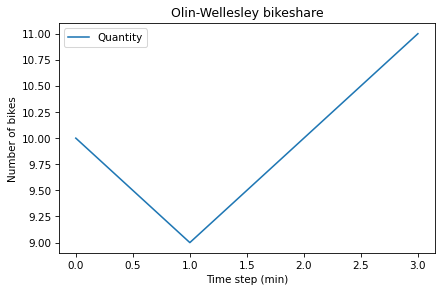

In [79]:
results.plot()

decorate(title='Olin-Wellesley bikeshare',
         xlabel='Time step (min)',
         ylabel='Number of bikes')

In [83]:
bikeshare = State(olin=10, wellesley=2)

bikeshare.wellesley

2

In [82]:
bikeshare = State(olin=10, wellesley=2)

bikeshare.welesley

AttributeError: ignored

In [85]:
bikeshare = State(olin=10, wellesley=2,downtown=0)
show(bikeshare)

,state
olin,10
wellesley,2
downtown,0


In [86]:
def run_simulation(p1,p2,num_steps):
  results=TimeSeries()
  results[0]=bikeshare.olin
  for i in range(num_steps):
    step(p1,p2)
    results[i+1]=bikeshare.olin
  results.plot()
  decorate(title='Olin-Wellesley Bikeshare',
             xlabel='Time step (min)',
             ylabel='Number of bikes')

Moving to wellesley
Moving to wellesley
Moving to wellesley
Moving to olin
Moving to wellesley
Moving to wellesley
Moving to wellesley
Moving to olin
Moving to olin
Moving to wellesley
Moving to wellesley
Moving to olin
Moving to wellesley
Moving to olin
Moving to olin
Moving to wellesley
Moving to olin
Moving to wellesley
Moving to wellesley
Moving to olin
Moving to wellesley
Moving to olin
Moving to olin
Moving to wellesley
Moving to olin
Moving to wellesley
Moving to wellesley
Moving to wellesley
Moving to olin
Moving to wellesley


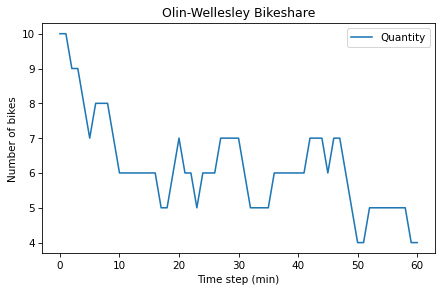

In [87]:
bikeshare = State(olin=10, wellesley=2)
run_simulation(0.3,0.2,60)

<Axes: xlabel='Time'>

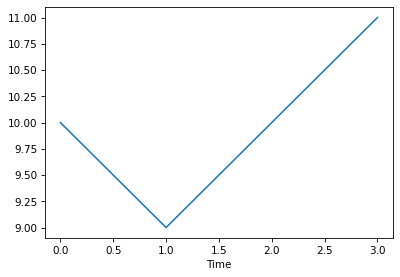

In [88]:
results.plot()

In [89]:
plot(results)

NameError: ignored

In [92]:
source_code(flip)


def flip(p=0.5):
    """Flips a coin with the given probability.

    p: float 0-1

    returns: boolean (True or False)
    """
    return np.random.random() < p



In [94]:
def flip(p=0.5):
    return np.random.random() < p
flip()

False